## 0.1 Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

## 0.2 Import Data

In [3]:
# Import ".json" file for the world

country_geo = r'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/JSON files/world-countries.json'

In [33]:
# Import the combined happiness reports

df = pd.read_csv((r'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/Prepared Data/All_years_happiness.csv'))

## 0.3 Data Wrangling

In [34]:
# Removing the limit to the number of columns displayed

pd.options.display.max_columns = None

In [13]:
df.head()

Country  Years Year country combined  Happiness Rank  Happiness Score  \
0  Switzerland   2015     Switzerland, 2015               1            7.587   
1      Iceland   2015         Iceland, 2015               2            7.561   
2      Denmark   2015         Denmark, 2015               3            7.527   
3       Norway   2015          Norway, 2015               4            7.522   
4       Canada   2015          Canada, 2015               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  
0                        0.41978     0.29678  
1                        0.14145     0.43630  
2                        0.48357     0.34139  
3                        0.36503     0.34699  
4                        0.32957     0.45811

## 0.4 Data Cleaning & Consistency checks

In [48]:
# Check for missing values

df.isnull().sum()

Country                          0
Years                            0
Year country combined            0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [55]:
# Check for duplicates

dups = df.duplicated()

In [57]:
dups.shape

(782,)

#### As I have already cleaned the data in previous notebooks. Nothing needed to be dropped.

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Count'>

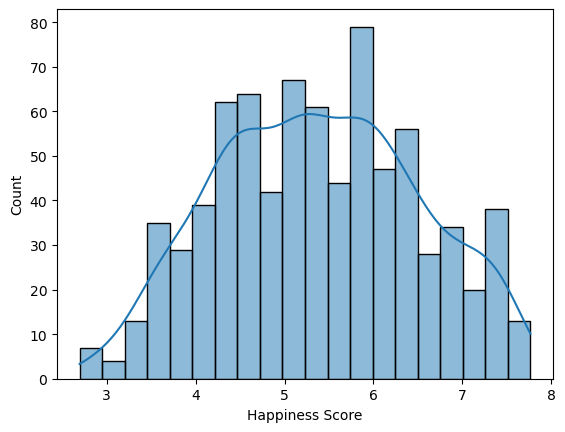

In [50]:
#Extreme values check

sns.histplot(df['Happiness Score'], bins=20, kde = True)

In [54]:
# Check how many extreme values

df[df['Happiness Score'] >7.55]

Country  Years Year country combined  Happiness Rank  \
0    Switzerland   2015     Switzerland, 2015               1   
1        Iceland   2015         Iceland, 2015               2   
470      Finland   2018         Finland, 2018               1   
471       Norway   2018          Norway, 2018               2   
472      Denmark   2018         Denmark, 2018               3   
626      Finland   2019         Finland, 2019               1   
627      Denmark   2019         Denmark, 2019               2   
628       Norway   2019          Norway, 2019               3   

     Happiness Score  Economy (GDP per Capita)   Family  \
0              7.587                   1.39651  1.34951   
1              7.561                   1.30232  1.40223   
470            7.632                   1.30500  1.59200   
471            7.594                   1.45600  1.58200   
472            7.555                   1.35100  1.59000   
626            7.769                   1.34000  1.58700   
627            7.600                   1.38300  1.57300   
628            7.554                   1.48800  1.58200   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
470                   0.87400  0.68100                        0.39300   
471                   0.86100  0.68600                        0.34000   
472                   0.86800  0.68300                        0.40800   
626                   0.98600  0.59600                        0.39300   
627                   0.99600  0.59200                        0.41000   
628                   1.02800  0.60300                        0.34100   

     Generosity  
0       0.29678  
1       0.43630  
470     0.20200  
471     0.28600  
472     0.28400  
626     0.15300  
627     0.25200  
628     0.27100

### As I don't want to exclude any countries' happiness score as this is what my entire investigation is about, to get a complete overview and seeing as only 8 rows (5 countries) are 'extreme', I don't feel it's necessary to exclude. 

## 0.5 Chloropleth

In [36]:
df.columns

Index(['Country', 'Years', 'Year country combined', 'Happiness Rank',
       'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [37]:
df[['Country','Happiness Score']].groupby('Country').agg('mean')['Happiness Score']

Country
Afghanistan    3.51280
Albania        4.71260
Algeria        5.66760
Angola         3.87225
Argentina      6.45940
                ...   
Venezuela      5.53140
Vietnam        5.15460
Yemen          3.62580
Zambia         4.58440
Zimbabwe       4.00660
Name: Happiness Score, Length: 170, dtype: float64

In [38]:
df[['Country','Happiness Score']].groupby('Country').agg('median')['Happiness Score']

Country
Afghanistan    3.5750
Albania        4.6550
Algeria        5.6050
Angola         3.8305
Argentina      6.5740
                ...  
Venezuela      5.2500
Vietnam        5.1030
Yemen          3.5930
Zambia         4.5140
Zimbabwe       3.8750
Name: Happiness Score, Length: 170, dtype: float64

In [39]:
df[['Country','Happiness Rank']].groupby('Country').agg('mean')['Happiness Rank']

Country
Afghanistan    149.4
Albania        106.4
Algeria         66.2
Angola         140.0
Argentina       31.2
               ...  
Venezuela       71.8
Vietnam         90.8
Yemen          146.4
Zambia         114.0
Zimbabwe       134.8
Name: Happiness Rank, Length: 170, dtype: float64

In [41]:
# Aggregate and Group By 'Country', and calculate the mean of 'Happiness Score'

happiness_mean = df[['Country', 'Happiness Score']].groupby('Country').agg('mean')['Happiness Score']

In [42]:
happiness_mean

Country
Afghanistan    3.51280
Albania        4.71260
Algeria        5.66760
Angola         3.87225
Argentina      6.45940
                ...   
Venezuela      5.53140
Vietnam        5.15460
Yemen          3.62580
Zambia         4.58440
Zimbabwe       4.00660
Name: Happiness Score, Length: 170, dtype: float64

In [40]:
# create a df with just the country and values to plot

data_to_plot = df[['Country', 'Happiness Score']].dropna()
data_to_plot.head()

Country  Happiness Score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427

In [43]:
# Convert the happiness_mean Series to a DataFrame

happiness_df = happiness_mean.reset_index()
happiness_df.columns = ['Country', 'Happiness Score']  # Rename columns for consistency

In [47]:
# Plot the choropleth
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data=country_geo,
    data=happiness_df,
    columns=['Country', 'Happiness Score'],
    key_on='feature.properties.name',
    fill_color='YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name="Happiness Score").add_to(map)

# Add layer control
folium.LayerControl().add_to(map)

#save
map.save("/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/JSON files/choro_map.html")
map


## Q.8

#### Discuss the results and what they mean in a markdown section.
#### Does the analysis answer any of your existing research questions? 
#### This map doesn't really answer any questions by itself as it only shows country and mean happiness score. I does show the disparity in scores, and a pattern in continents. However, it does no answer the question of how other variales affect Happiness score. Or the change over time.

#### Does the analysis lead you to any new research questions?
#### Since the vast majority of countries are the same color, this isn't as informative as I'd like. I feel I would be able to control the output and visualisations a lot more if I used a tool like tableau.